In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
notices_mapping = {
    'edital-70':'EDITAL PROAES/UFMS Nº 70',
    'edital-9':'EDITAL PROAES/PROGRAD/PROPP/UFMS N° 9',
    'regulamento':'REGULAMENTO CURSOS DE GRADUAÇÃO DA UFMS'
}

In [4]:
metric_mapping = {
    'faithfulness': 'Fidelidade',
    'answer_relevancy': 'Relevância da Resposta',
    'context_precision': 'Precisão do Contexto',
    'context_recall': 'Recall do Contexto'
}

In [5]:
# read all csv files in the tests/third_results/whole-dataset directory
def read_csv_files(directory):
    import os
    import glob

    # Create a list to hold DataFrames
    dataframes = pd.DataFrame()

    # Use glob to find all CSV files in the directory
    csv_files = glob.glob(os.path.join(directory, '*metrics.csv'))

    # Read each CSV file and append the DataFrame to the list
    for file in csv_files:
        _ = pd.read_csv(file)
        print(file)
        _['model'] = file.split('-few')[0].split(directory + '/')[1]  # Extract model name from file path
        # extract the pattern "edital-\d+" from the file name
        _['file'] = file.split('split-')[1].removesuffix('-metrics.csv')
        
        dataframes = pd.concat([dataframes, _], ignore_index=True)

    return dataframes

In [5]:
df = read_csv_files('../tests/third-results/whole-dataset')

../tests/third-results/whole-dataset/sabia-3.1-few-shot-reranker-bertimbau-semantic-split-regulamento-metrics.csv
../tests/third-results/whole-dataset/llama3.1-few-shot-reranker-bertimbau-semantic-split-regulamento-metrics.csv
../tests/third-results/whole-dataset/llama3.1-few-shot-reranker-bertimbau-semantic-split-edital-9-metrics.csv
../tests/third-results/whole-dataset/sabia-3.1-few-shot-reranker-bertimbau-semantic-split-edital-9-metrics.csv
../tests/third-results/whole-dataset/phi3:medium-few-shot-reranker-bertimbau-semantic-split-edital-9-metrics.csv
../tests/third-results/whole-dataset/sabia-3.1-few-shot-reranker-bertimbau-semantic-split-edital-70-metrics.csv
../tests/third-results/whole-dataset/phi3:medium-few-shot-reranker-bertimbau-semantic-split-edital-70-metrics.csv
../tests/third-results/whole-dataset/llama3.1-few-shot-reranker-bertimbau-semantic-split-edital-70-metrics.csv
../tests/third-results/whole-dataset/phi3:medium-few-shot-reranker-bertimbau-semantic-split-regulament

In [6]:
df

,user_input,retrieved_contexts,response,reference,context_precision,context_recall,faithfulness,answer_relevancy,model,file
0,Quais são as diretrizes relacionadas ao Projet...,['10. O Estágio é uma a\x00vidade de natureza ...,"De acordo com o Art. 11 do documento, o Estág...",['26/12/2021 22:12 SEI/UFMS - 3003041 - Resolu...,1.000000,0.777778,0.375000,0.929387,sabia-3.1,regulamento
1,Quais são os tipos de Componentes Curriculares...,['26/12/2021 22:12 SEI/UFMS - 3003041 - Resolu...,Os tipos de Componentes Curriculares Não Disc...,['26/12/2021 22:12 SEI/UFMS - 3003041 - Resolu...,1.000000,0.466667,1.000000,0.972685,sabia-3.1,regulamento
2,Como funcionam as aulas na UFMS?,['26/12/2021 22:12 SEI/UFMS - 3003041 - Resolu...,"As aulas na UFMS funcionam em três turnos, co...",['26/12/2021 22:12 SEI/UFMS - 3003041 - Resolu...,1.000000,1.000000,0.909091,0.934982,sabia-3.1,regulamento
3,O que é o Programa de Avaliação Seriada Seleva...,['61. O Plano de Ensino deve ser elaborado e r...,O Programa de Avaliação Seriada Seletiva (PAS...,['26/12/2021 22:12 SEI/UFMS - 3003041 - Resolu...,0.333333,0.375000,0.166667,0.000000,sabia-3.1,regulamento
4,O que é a UFMS e como funciona a seleção para ...,['26/12/2021 22:12 SEI/UFMS - 3003041 - Resolu...,A Universidade Federal de Mato Grosso do Sul ...,['26/12/2021 22:12 SEI/UFMS - 3003041 - Resolu...,1.000000,1.000000,0.739130,0.929241,sabia-3.1,regulamento
...,...,...,...,...,...,...,...,...,...,...
403,O que é um Curso de Graduação e como funciona ...,['Parágrafo único. Os cursos de graduação pres...,"De acordo com o Art. 56, a Lista de Oferta de ...",['26/12/2021 22:12 SEI/UFMS - 3003041 - Resolu...,1.000000,1.000000,0.750000,0.866848,phi3:medium,regulamento
404,O que é o SEI na universidade?,['26/12/2021 22:12 SEI/UFMS - 3003041 - Resolu...,De acordo com o item 26/12/2021 22:12 SEI/UFMS...,['26/12/2021 22:12 SEI/UFMS - 3003041 - Resolu...,0.000000,0.916667,0.500000,0.928418,phi3:medium,regulamento
405,Qual é a função do Siscad no contexto acadêmico?,['26/12/2021 22:12 SEI/UFMS - 3003041 - Resolu...,"De acordo com o item 64, o Sistema Acadêmico d...",['26/12/2021 22:12 SEI/UFMS - 3003041 - Resolu...,1.000000,0.900000,1.000000,0.920125,phi3:medium,regulamento
406,Qual é a relação entre o Poder Judiciário e a ...,['26/12/2021 22:12 SEI/UFMS - 3003041 - Resolu...,"De acordo com o item 70 do edital, as regras r...",['26/12/2021 22:12 SEI/UFMS - 3003041 - Resolu...,1.000000,0.916667,0.500000,0.887010,phi3:medium,regulamento


In [7]:
tmp = df.groupby(['model', 'file']).agg({'faithfulness':'mean', 'answer_relevancy':'mean',
                                      'context_precision':'mean', 'context_recall':'mean'}).reset_index()

In [8]:
tmp

,model,file,faithfulness,answer_relevancy,context_precision,context_recall
0,llama3.1,edital-70,0.889894,0.795416,0.978723,0.899992
1,llama3.1,edital-9,0.629486,0.664196,0.967480,0.740332
2,llama3.1,regulamento,0.772527,0.676898,0.946181,0.679479
3,phi3:medium,edital-70,0.387292,0.322079,0.978723,0.886870
4,phi3:medium,edital-9,0.536906,0.498106,0.967480,0.764381
5,phi3:medium,regulamento,0.737527,0.837326,0.940972,0.684803
6,sabia-3.1,edital-70,0.824125,0.785380,0.978723,0.891508
7,sabia-3.1,edital-9,0.778984,0.619469,0.967480,0.728489
8,sabia-3.1,regulamento,0.750253,0.804944,0.935764,0.634334


### criando base para tabelas do arquivo

In [9]:
import math

for metric in metric_mapping.keys():
    tmp[metric] = tmp[metric].apply(lambda x: math.trunc(x * 1000) / 1000)

In [13]:
tmp.sort_values(by=['file', 'model'], inplace=True)

In [14]:
tmp[['file', 'model', *metric_mapping.keys()]].to_csv('../tests/tables/metrics.csv', index=False)

In [10]:
tmp.sort_values(by=['model', 'file'], inplace=True)

In [11]:
tmp['normalized_file'] = [notices_mapping[x] if x in notices_mapping else x for x in tmp['file']]

In [12]:
tmp

,model,file,faithfulness,answer_relevancy,context_precision,context_recall,normalized_file
0,llama3.1,edital-70,0.889894,0.795416,0.978723,0.899992,EDITAL PROAES/UFMS Nº 70
1,llama3.1,edital-9,0.629486,0.664196,0.967480,0.740332,EDITAL PROAES/PROGRAD/PROPP/UFMS N° 9
2,llama3.1,regulamento,0.772527,0.676898,0.946181,0.679479,REGULAMENTO CURSOS DE GRADUAÇÃO DA UFMS
3,phi3:medium,edital-70,0.387292,0.322079,0.978723,0.886870,EDITAL PROAES/UFMS Nº 70
4,phi3:medium,edital-9,0.536906,0.498106,0.967480,0.764381,EDITAL PROAES/PROGRAD/PROPP/UFMS N° 9
5,phi3:medium,regulamento,0.737527,0.837326,0.940972,0.684803,REGULAMENTO CURSOS DE GRADUAÇÃO DA UFMS
6,sabia-3.1,edital-70,0.824125,0.785380,0.978723,0.891508,EDITAL PROAES/UFMS Nº 70
7,sabia-3.1,edital-9,0.778984,0.619469,0.967480,0.728489,EDITAL PROAES/PROGRAD/PROPP/UFMS N° 9
8,sabia-3.1,regulamento,0.750253,0.804944,0.935764,0.634334,REGULAMENTO CURSOS DE GRADUAÇÃO DA UFMS


### figuras

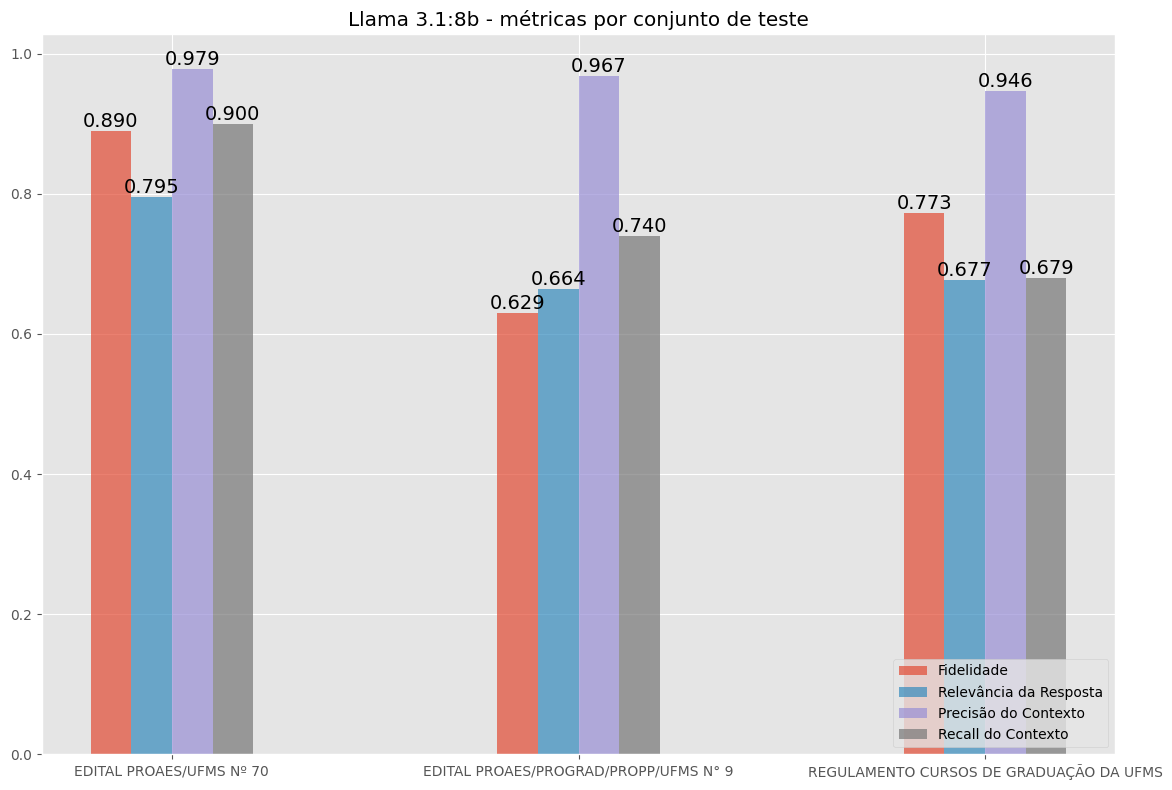

In [17]:
plt.style.use('ggplot')
model_data = tmp[tmp['model'] == 'llama3.1']

plt.figure(figsize=(12, 8))

# Set bar width and positions
width = 0.1
x = np.arange(len(model_data['file']))

metrics = ['faithfulness', 'answer_relevancy', 'context_precision', 'context_recall']
for i, metric in enumerate(metrics):
    # Offset each set of bars
    offset = width * i - (width * len(metrics)/2) + width/2
    bars = plt.bar(x + offset, model_data[metric], width, label=metric_mapping[metric], alpha=0.7)
    
    # Add value labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=14)

plt.title('Llama 3.1:8b - métricas por conjunto de teste')
plt.xticks(x, model_data['normalized_file'], rotation=0)
plt.legend(loc='lower right')

plt.tight_layout()
plt.savefig('../tests/graphs/llama3.1-metrics.pdf', format='pdf', bbox_inches='tight')
plt.show()

# save the figure as a pdf

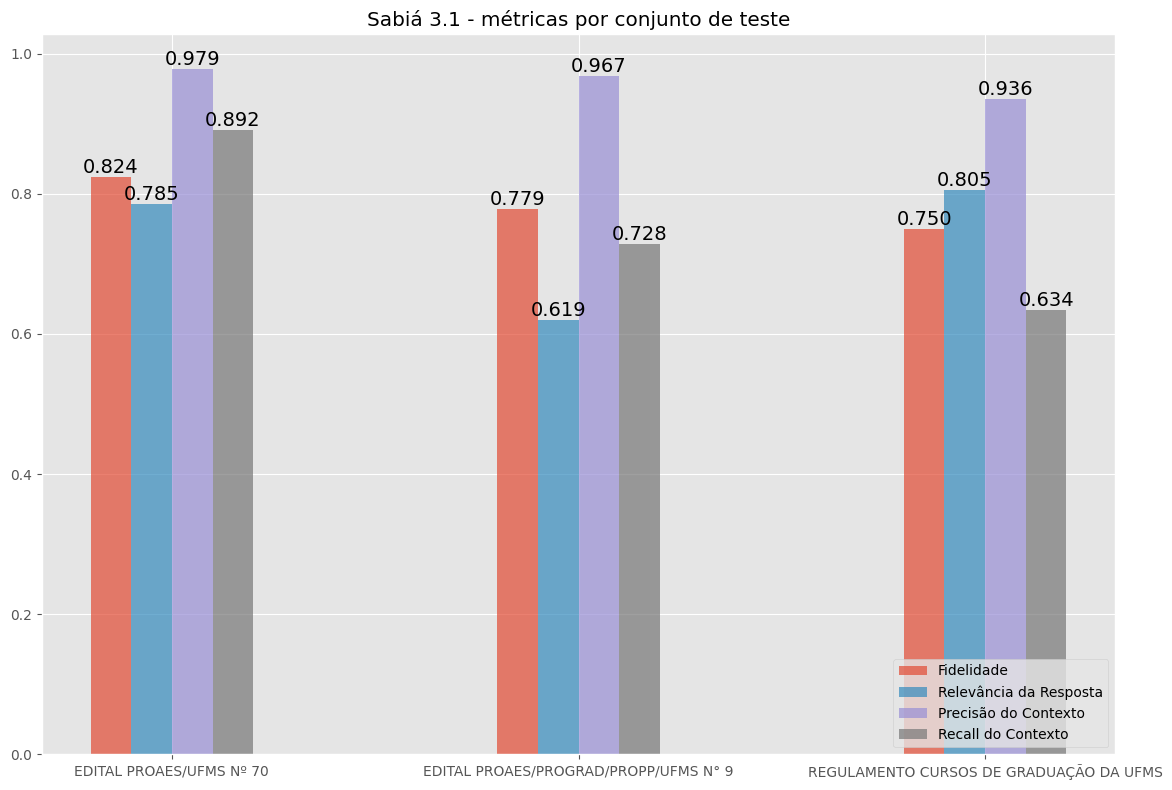

In [18]:
plt.style.use('ggplot')
model_data = tmp[tmp['model'] == 'sabia-3.1']

plt.figure(figsize=(12, 8))

# Set bar width and positions
width = 0.1
x = np.arange(len(model_data['file']))

metrics = ['faithfulness', 'answer_relevancy', 'context_precision', 'context_recall']
for i, metric in enumerate(metrics):
    # Offset each set of bars
    offset = width * i - (width * len(metrics)/2) + width/2
    bars = plt.bar(x + offset, model_data[metric], width, label=metric_mapping[metric], alpha=0.7)
    
    # Add value labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=14)

plt.title('Sabiá 3.1 - métricas por conjunto de teste')
plt.xticks(x, model_data['normalized_file'], rotation=0)
plt.legend(loc='lower right')

plt.tight_layout()
plt.savefig('../tests/graphs/sabia3.1-metrics.pdf', format='pdf', bbox_inches='tight')
plt.show()

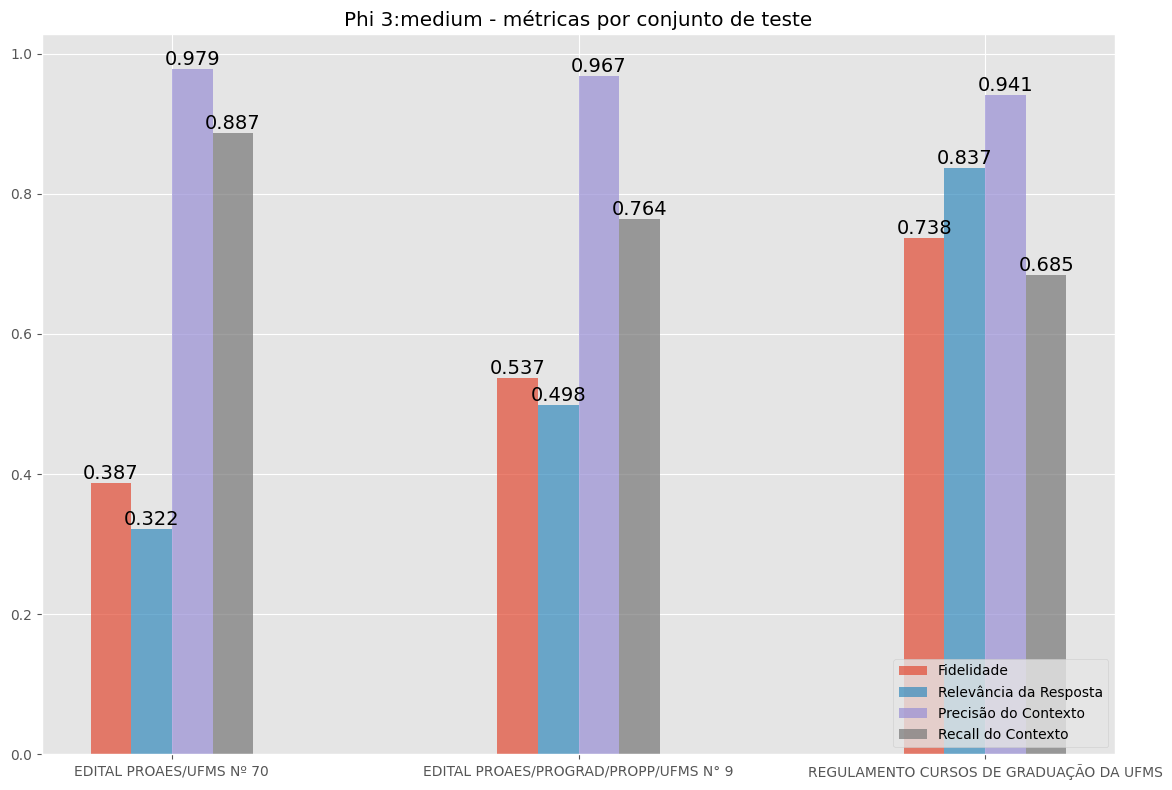

In [19]:
plt.style.use('ggplot')
model_data = tmp[tmp['model'] == 'phi3:medium']

plt.figure(figsize=(12, 8))

# Set bar width and positions
width = 0.1
x = np.arange(len(model_data['file']))

metrics = ['faithfulness', 'answer_relevancy', 'context_precision', 'context_recall']
for i, metric in enumerate(metrics):
    # Offset each set of bars
    offset = width * i - (width * len(metrics)/2) + width/2
    bars = plt.bar(x + offset, model_data[metric], width, label=metric_mapping[metric], alpha=0.7)
    
    # Add value labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=14)

plt.title('Phi 3:medium - métricas por conjunto de teste')
plt.xticks(x, model_data['normalized_file'], rotation=0)
plt.legend(loc='lower right')

plt.tight_layout()
plt.savefig('../tests/graphs/phi3-metrics.pdf', format='pdf', bbox_inches='tight')
plt.show()

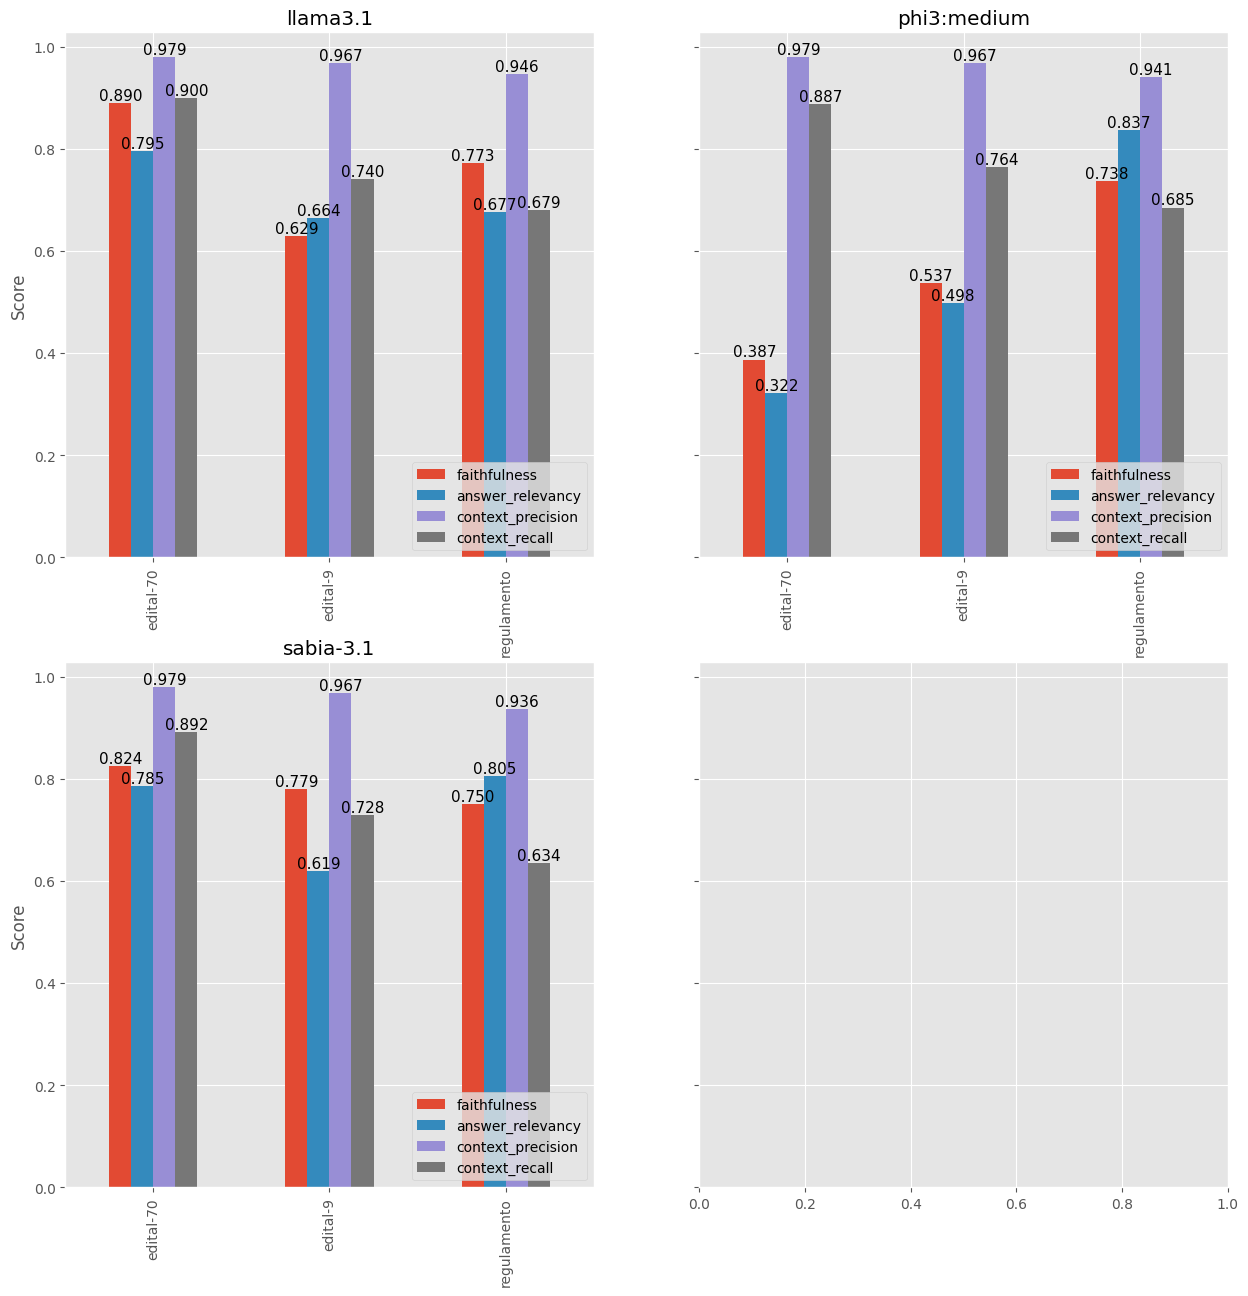

In [21]:
# create a figure with 6 subplots. One for each combination of model and file, with all the metrics displayed as bars
fig, axs = plt.subplots(2, 2, figsize=(15, 15), sharey=True)
for i, (model, group) in enumerate(tmp.groupby('model')):
    ax = axs[i // 2, i % 2]
    group.set_index('file').plot(kind='bar', ax=ax)
    ax.set_title(model)
    ax.set_ylabel('Score')
    ax.set_xlabel('')
    ax.legend(loc='lower right')

    for container in ax.containers:
        ax.bar_label(container, fmt='%.3f', label_type='edge', fontsize=11, rotation=0)

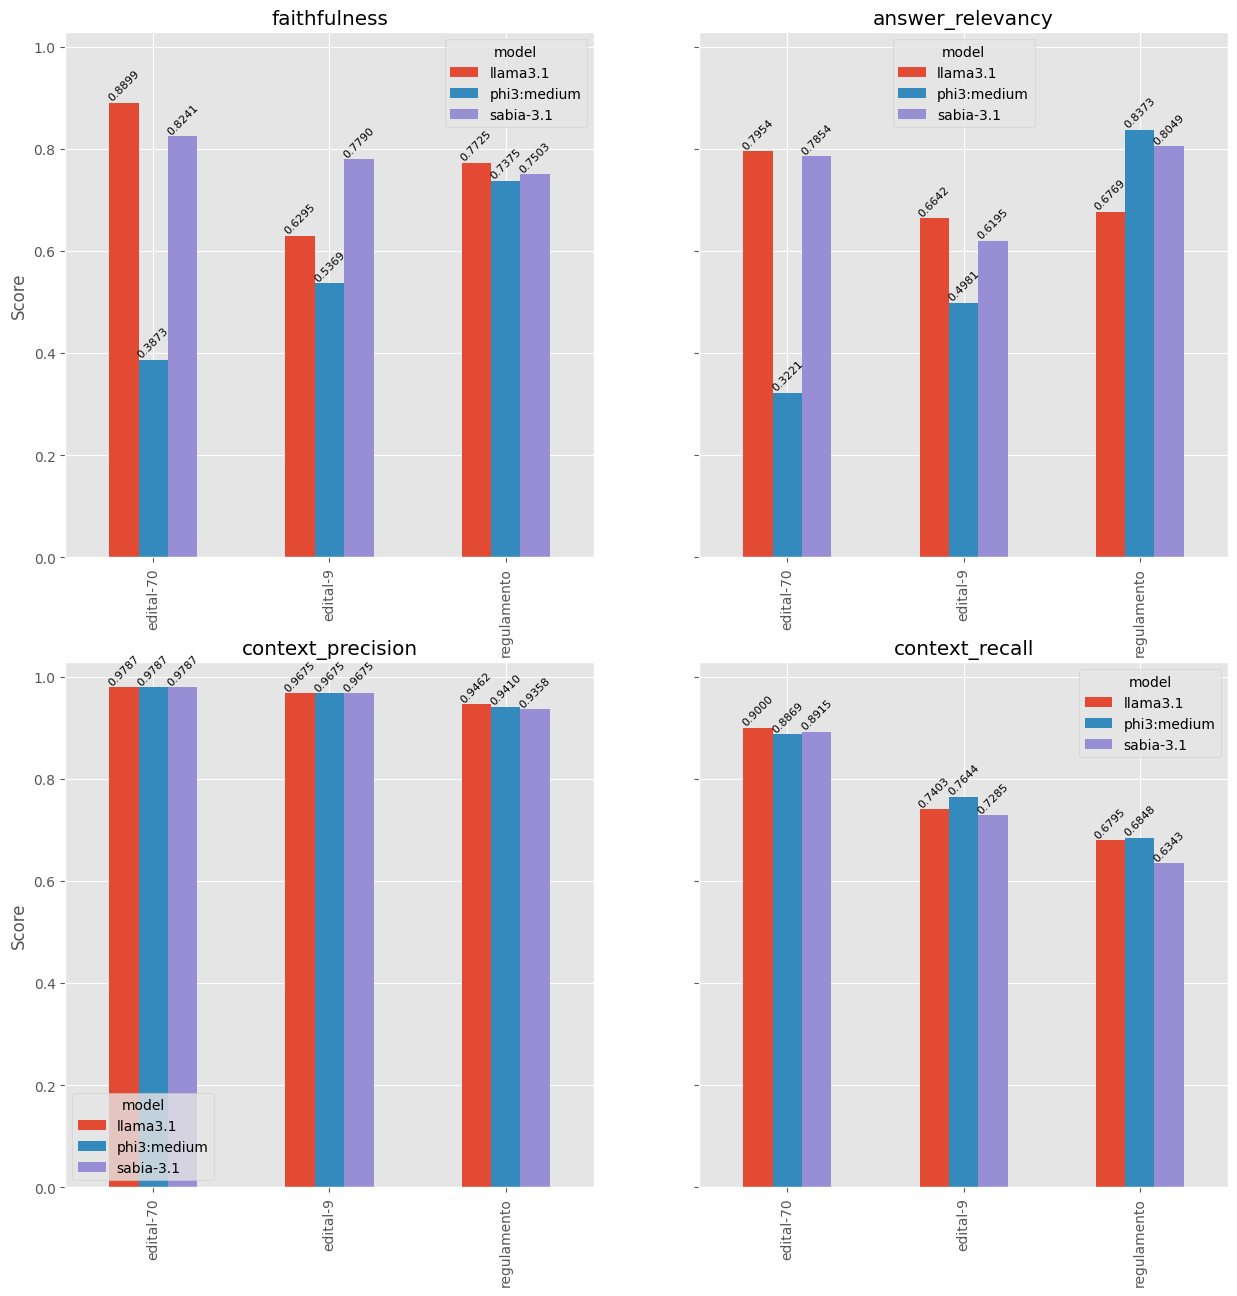

In [110]:
# create a figure with 4 subplots, one for each metric, showing the score across all models and files
fig2, axs2 = plt.subplots(2, 2, figsize=(15, 15), sharey=True)
for i, metric in enumerate(['faithfulness', 'answer_relevancy', 'context_precision', 'context_recall']):
    ax = axs2[i // 2, i % 2]
    tmp.pivot(index='file', columns='model', values=metric).plot(kind='bar', ax=ax)
    ax.set_title(metric)
    ax.set_ylabel('Score')
    ax.set_xlabel('')
    # ax.legend(loc='upper right')
    
    for container in ax.containers:
        ax.bar_label(container, fmt='%.4f', label_type='edge', fontsize=8, rotation=45)

### COMPARAÇÃO DOS DIFERENTES MODELO DO LLAMA

In [6]:
df2 = read_csv_files('../tests/llama')

../tests/llama/llama3.3:70b-few-shot-reranker-bertimbau-semantic-split-regulamento-metrics.csv
../tests/llama/llama3.2:3b-few-shot-reranker-bertimbau-semantic-split-edital-70-metrics.csv
../tests/llama/llama3.1:8b-few-shot-reranker-bertimbau-semantic-split-edital-70-metrics.csv
../tests/llama/llama3.3:70b-few-shot-reranker-bertimbau-semantic-split-edital-70-metrics.csv
../tests/llama/llama3.2:1b-few-shot-reranker-bertimbau-semantic-split-regulamento-metrics.csv
../tests/llama/llama3.1:8b-few-shot-reranker-bertimbau-semantic-split-regulamento-metrics.csv
../tests/llama/llama3.1:70b-few-shot-reranker-bertimbau-semantic-split-regulamento-metrics.csv
../tests/llama/llama3.1:70b-few-shot-reranker-bertimbau-semantic-split-edital-70-metrics.csv
../tests/llama/llama3.2:3b-few-shot-reranker-bertimbau-semantic-split-regulamento-metrics.csv
../tests/llama/llama3.2:1b-few-shot-reranker-bertimbau-semantic-split-edital-70-metrics.csv
../tests/llama/llama3.2:3b-few-shot-reranker-bertimbau-semantic-sp

In [7]:
tmp = df2.groupby(['model', 'file']).agg({'faithfulness':'mean', 'answer_relevancy':'mean',
                                      'context_precision':'mean', 'context_recall':'mean'}).reset_index()

### criando base pras tabelas do arquivo

In [17]:
import math

for metric in metric_mapping.keys():
    tmp[metric] = tmp[metric].apply(lambda x: math.trunc(x * 1000) / 1000)

In [18]:
tmp.sort_values(by=['file', 'model'], inplace=True)

In [20]:
tmp[['file', 'model', *metric_mapping.keys()]].to_csv('../tests/tables/metrics-ollama-models.csv', index=False)

In [19]:
tmp

,model,file,faithfulness,answer_relevancy,context_precision,context_recall
0,llama3.1:70b,edital-70,0.868,0.806,0.978,0.858
3,llama3.1:8b,edital-70,0.889,0.795,0.978,0.899
6,llama3.2:1b,edital-70,0.669,0.647,0.978,0.905
9,llama3.2:3b,edital-70,0.638,0.648,0.978,0.897
12,llama3.3:70b,edital-70,0.883,0.847,0.978,0.896
1,llama3.1:70b,edital-9,0.678,0.726,0.957,0.746
4,llama3.1:8b,edital-9,0.629,0.664,0.967,0.740
7,llama3.2:1b,edital-9,0.539,0.658,0.977,0.784
10,llama3.2:3b,edital-9,0.558,0.655,0.977,0.747
13,llama3.3:70b,edital-9,0.791,0.641,0.989,0.733


### figuras

In [8]:
# extract the number of parameters from the model name
tmp['n_parameters'] = tmp['model'].str.extract(r'(\d+)b').astype(int)

In [16]:
plt.style.use('ggplot')

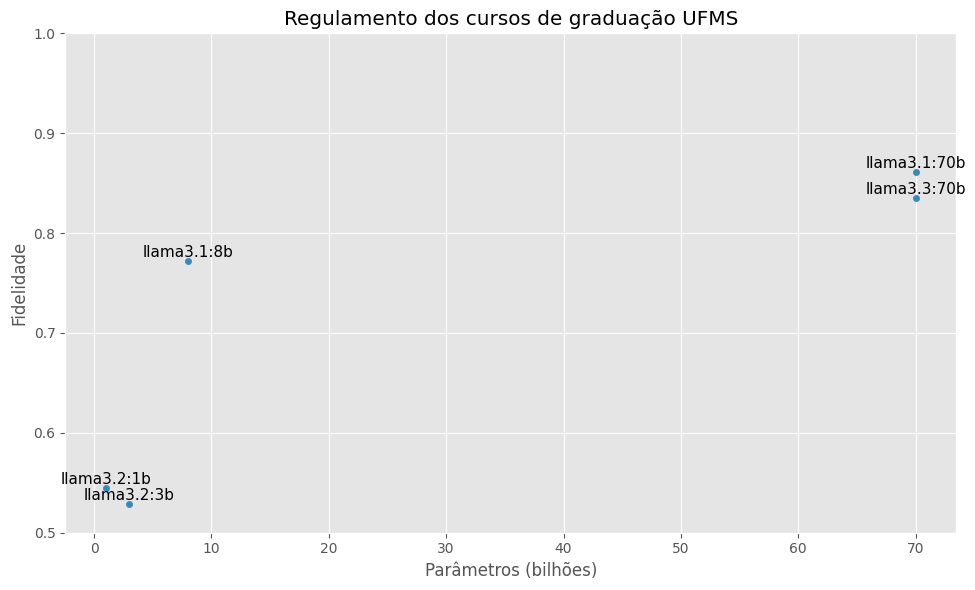

In [18]:
# just for "regulamento" file, create subplots showing the faithfulness score by model, variying the number of parameters
fig3, ax3 = plt.subplots(figsize=(10, 6))
tmp[tmp['file'] == 'regulamento'].sort_values(by='n_parameters').plot(x='n_parameters', y='faithfulness', kind='scatter', ax=ax3)
ax3.set_title('Regulamento dos cursos de graduação UFMS')
ax3.set_ylabel('Fidelidade')
ax3.set_xlabel('Parâmetros (bilhões)')    

for i, txt in enumerate(tmp[tmp['file'] == 'regulamento']['model']):
    ax3.text(tmp[tmp['file'] == 'regulamento']['n_parameters'].iloc[i], tmp[tmp['file'] == 'regulamento']['faithfulness'].iloc[i] + 0.004, txt, fontsize=11, rotation=0, ha='center')

plt.tight_layout()
# put the y axis limits to 0.5 and 1.0
ax3.set_ylim(0.5, 1.0)
plt.savefig('../tests/graphs/llama-regulamento-fidelidade-metrics.pdf', format='pdf', bbox_inches='tight')
plt.show()

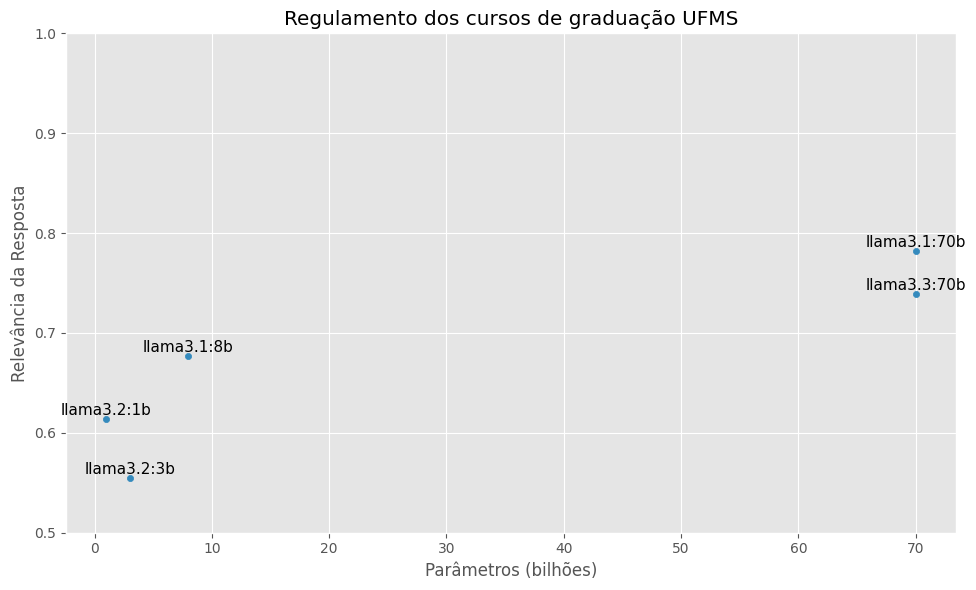

In [19]:
# just for "regulamento" file, create subplots showing the faithfulness score by model, variying the number of parameters
fig3, ax3 = plt.subplots(figsize=(10, 6))
tmp[tmp['file'] == 'regulamento'].sort_values(by='n_parameters').plot(x='n_parameters', y='answer_relevancy', kind='scatter', ax=ax3)
ax3.set_title('Regulamento dos cursos de graduação UFMS')
ax3.set_ylabel('Relevância da Resposta')
ax3.set_xlabel('Parâmetros (bilhões)')        

for i, txt in enumerate(tmp[tmp['file'] == 'regulamento']['model']):
    ax3.text(tmp[tmp['file'] == 'regulamento']['n_parameters'].iloc[i], tmp[tmp['file'] == 'regulamento']['answer_relevancy'].iloc[i] + 0.004, txt, fontsize=11, rotation=0, ha='center')

plt.tight_layout()
ax3.set_ylim(0.5, 1.0)
plt.savefig('../tests/graphs/llama-regulamento-relevancia-metrics.pdf', format='pdf', bbox_inches='tight')
plt.show()

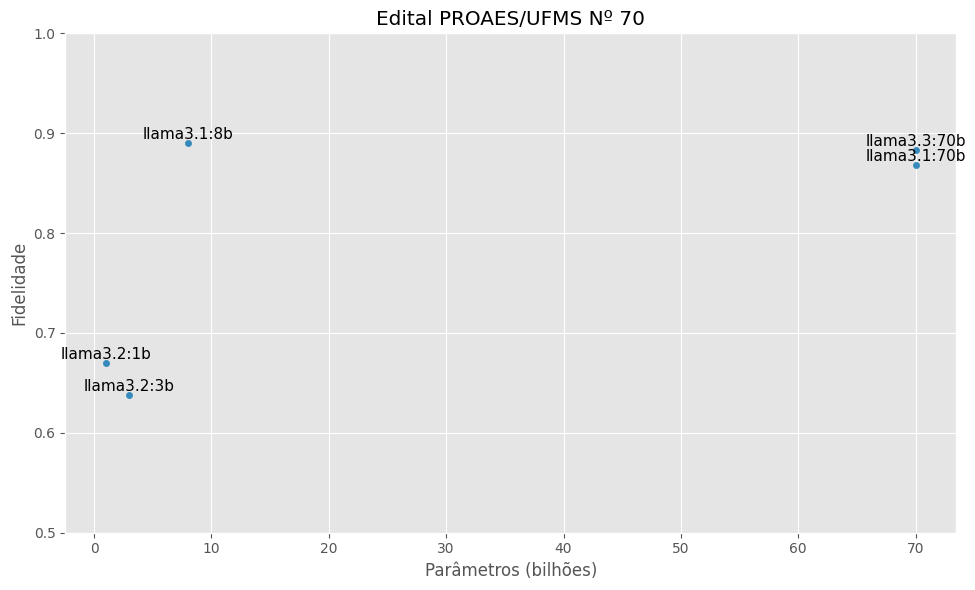

In [20]:
# just for "regulamento" file, create subplots showing the faithfulness score by model, variying the number of parameters
fig3, ax3 = plt.subplots(figsize=(10, 6))
tmp[tmp['file'] == 'edital-70'].sort_values(by='n_parameters').plot(x='n_parameters', y='faithfulness', kind='scatter', ax=ax3)
ax3.set_title('Edital PROAES/UFMS Nº 70')
ax3.set_ylabel('Fidelidade')
ax3.set_xlabel('Parâmetros (bilhões)')   

for i, txt in enumerate(tmp[tmp['file'] == 'edital-70']['model']):
    ax3.text(tmp[tmp['file'] == 'edital-70']['n_parameters'].iloc[i], tmp[tmp['file'] == 'edital-70']['faithfulness'].iloc[i] + 0.004, txt, fontsize=11, rotation=0, ha='center')

plt.tight_layout()
ax3.set_ylim(0.5, 1.0)
plt.savefig('../tests/graphs/llama-edital-70-fidelidade-metrics.pdf', format='pdf', bbox_inches='tight')
plt.show()

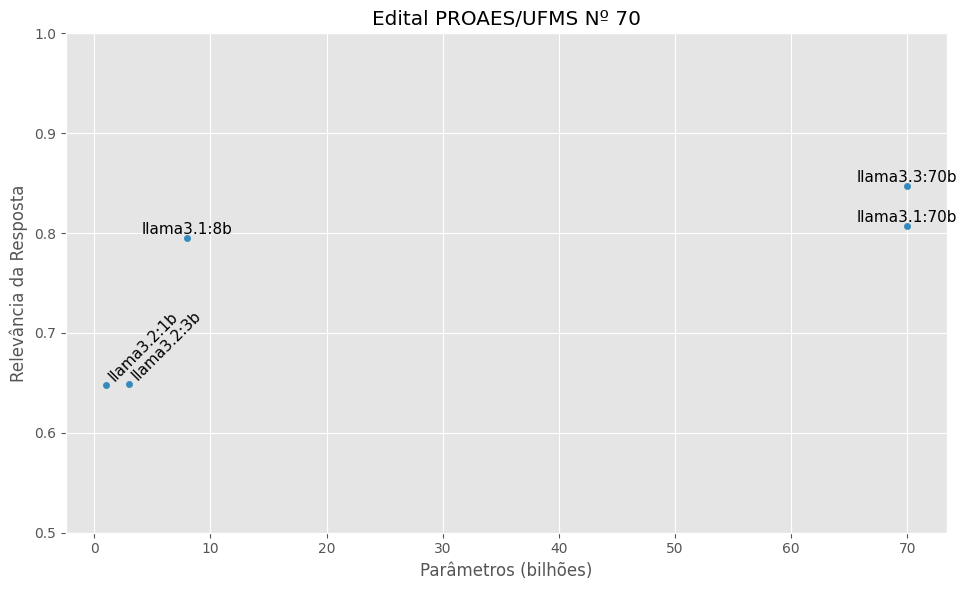

In [21]:
# just for "edital-70" file, create subplots showing the faithfulness score by model, variying the number of parameters
fig3, ax3 = plt.subplots(figsize=(10, 6))
tmp[tmp['file'] == 'edital-70'].sort_values(by='n_parameters').plot(x='n_parameters', y='answer_relevancy', kind='scatter', ax=ax3)
ax3.set_title('Edital PROAES/UFMS Nº 70')
ax3.set_ylabel('Relevância da Resposta')
ax3.set_xlabel('Parâmetros (bilhões)')   

for i, txt in enumerate(tmp[tmp['file'] == 'edital-70']['model']):
    
    if ('1b' in txt):
        ax3.text(tmp[tmp['file'] == 'edital-70']['n_parameters'].iloc[i], tmp[tmp['file'] == 'edital-70']['answer_relevancy'].iloc[i] + 0.004, txt, fontsize=11, rotation=45, ha='left')
    elif ('3b' in txt):
        ax3.text(tmp[tmp['file'] == 'edital-70']['n_parameters'].iloc[i], tmp[tmp['file'] == 'edital-70']['answer_relevancy'].iloc[i] + 0.004, txt, fontsize=11, rotation=45, ha='left')
    else:
        ax3.text(tmp[tmp['file'] == 'edital-70']['n_parameters'].iloc[i], tmp[tmp['file'] == 'edital-70']['answer_relevancy'].iloc[i] + 0.004, txt, fontsize=11, rotation=0, ha='center')

plt.tight_layout()
ax3.set_ylim(0.5, 1.0)
plt.savefig('../tests/graphs/llama-edital-70-relevancia-metrics.pdf', format='pdf', bbox_inches='tight')
plt.show()

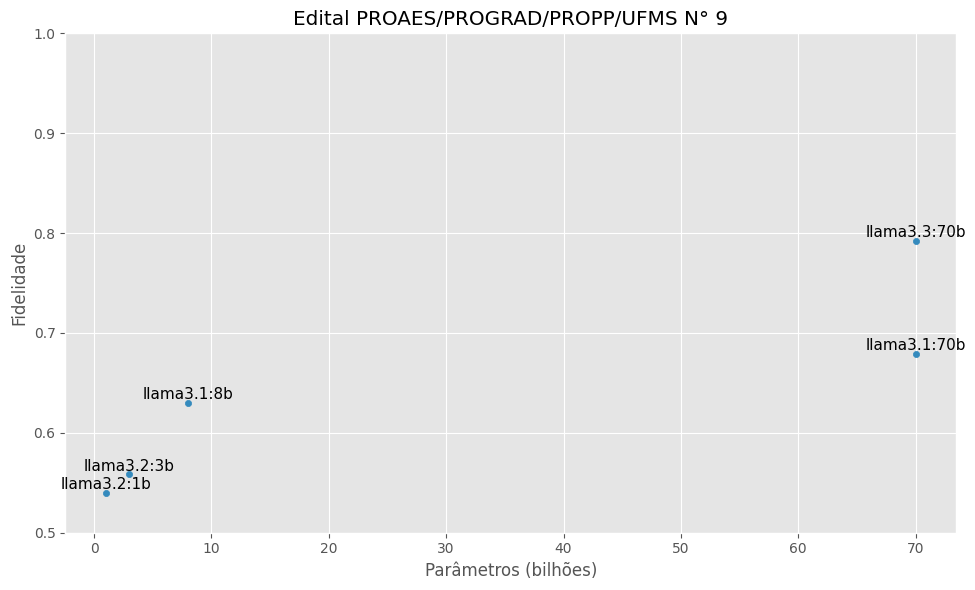

In [22]:
# just for "regulamento" file, create subplots showing the faithfulness score by model, variying the number of parameters
fig3, ax3 = plt.subplots(figsize=(10, 6))
tmp[tmp['file'] == 'edital-9'].sort_values(by='n_parameters').plot(x='n_parameters', y='faithfulness', kind='scatter', ax=ax3)
ax3.set_title('Edital PROAES/PROGRAD/PROPP/UFMS N° 9')
ax3.set_ylabel('Fidelidade')
ax3.set_xlabel('Parâmetros (bilhões)')  

for i, txt in enumerate(tmp[tmp['file'] == 'edital-9']['model']):
    ax3.text(tmp[tmp['file'] == 'edital-9']['n_parameters'].iloc[i], tmp[tmp['file'] == 'edital-9']['faithfulness'].iloc[i] + 0.004, txt, fontsize=11, rotation=0, ha='center')

plt.tight_layout()
ax3.set_ylim(0.5, 1.0)
plt.savefig('../tests/graphs/llama-edital-9-fidelidade-metrics.pdf', format='pdf', bbox_inches='tight')
plt.show()

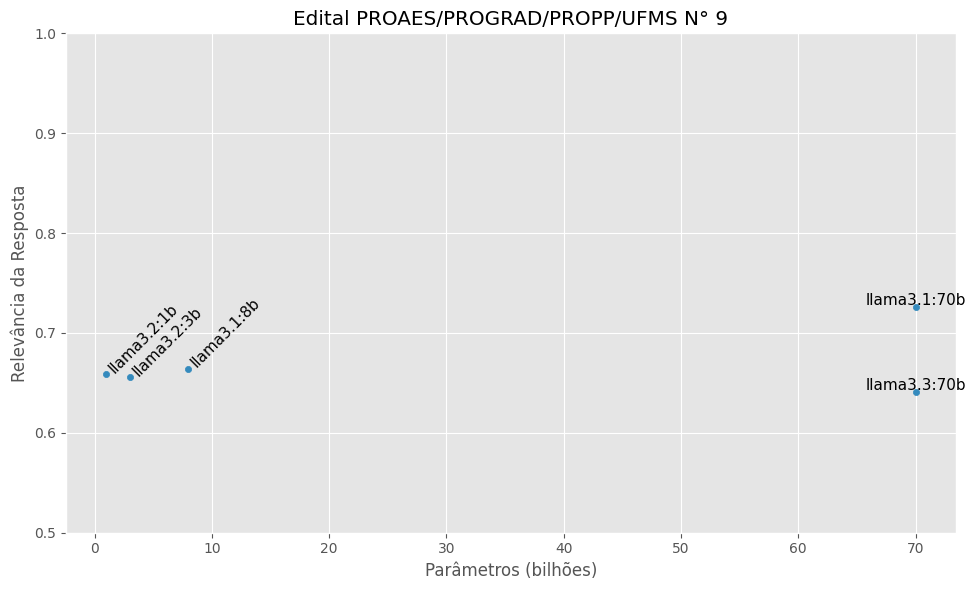

In [37]:
# just for "edital-9" file, create subplots showing the faithfulness score by model, variying the number of parameters
fig3, ax3 = plt.subplots(figsize=(10, 6))
tmp[tmp['file'] == 'edital-9'].sort_values(by='n_parameters').plot(x='n_parameters', y='answer_relevancy', kind='scatter', ax=ax3)
ax3.set_title('Edital PROAES/PROGRAD/PROPP/UFMS N° 9')
ax3.set_ylabel('Relevância da Resposta')
ax3.set_xlabel('Parâmetros (bilhões)')  

for i, txt in enumerate(tmp[tmp['file'] == 'edital-9']['model']):
    
    if ('1b' in txt):
        ax3.text(tmp[tmp['file'] == 'edital-9']['n_parameters'].iloc[i], tmp[tmp['file'] == 'edital-9']['answer_relevancy'].iloc[i] + 0.0015, txt, fontsize=11, rotation=45, ha='left')

    elif ('3b' in txt):
        ax3.text(tmp[tmp['file'] == 'edital-9']['n_parameters'].iloc[i], tmp[tmp['file'] == 'edital-9']['answer_relevancy'].iloc[i] + 0.0015, txt, fontsize=11, rotation=45, ha='left')
    elif ('70b' in txt):
        ax3.text(tmp[tmp['file'] == 'edital-9']['n_parameters'].iloc[i], tmp[tmp['file'] == 'edital-9']['answer_relevancy'].iloc[i] + 0.0015, txt, fontsize=11, rotation=0, ha='center')
    else:
        ax3.text(tmp[tmp['file'] == 'edital-9']['n_parameters'].iloc[i], tmp[tmp['file'] == 'edital-9']['answer_relevancy'].iloc[i] + 0.0015, txt, fontsize=11, rotation=45, ha='left')

plt.tight_layout()
ax3.set_ylim(0.5, 1.0)
plt.savefig('../tests/graphs/llama-edital-9-relevancia-metrics.pdf', format='pdf', bbox_inches='tight')
plt.show()